# F-subgiant comparison sample

We want to make a comparison sample of F subgiants to see if our target stands out in some way.  Mainly that means:

1. TESS lightcurve period/amplitude

But also conceivably:  

2. Flares?   
3. Spectral variability?  
4. Something else?  

In [1]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Get Table 1 from [Leiner et al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...927..222L/abstract)

In [2]:
fn = '../../data/literature/liener2022/apjac53b1t1_mrt.txt'

In [3]:
tab = Table.read(fn, format='ascii.mrt')

In [4]:
df = tab.to_pandas()

In [5]:
len(df)

1895

In [6]:
df.columns.values

array(['ID', 'VSX', 'TIC', 'RAdeg', 'DEdeg', 'D', 'Gmag', '(BP-RP)',
       'RUWE', 'chi2', 'NAL', 'PVSX', 'PTess', 'Amp', 'NSec', 'AV',
       'Class'], dtype=object)

In [7]:
df['G_absolute_mag'] = df['Gmag'] - 5*np.log10(df['D']) + 5

In [8]:
df_targ = Table.read('../../data/gaia/1668443694513O-result.vot').to_pandas()

In [9]:
#df_targ.columns.values

In [10]:
keep_cols = ['parallax', 'phot_g_mean_mag', 'bp_rp', 'teff_gspphot', 'logg_gspphot']

In [11]:
df_targ = df_targ[keep_cols]

In [12]:
df_targ

,parallax,phot_g_mean_mag,bp_rp,teff_gspphot,logg_gspphot
0,2.686932,9.979286,0.639657,6295.805176,3.7483
1,2.583131,16.715607,2.358242,3601.700439,4.4807


In [13]:
df_targ['D'] = 1/(df_targ['parallax']/1000.0)

In [14]:
df_targ['G_absolute_mag'] = df_targ['phot_g_mean_mag'] - 5*np.log10(df_targ['D']) + 5

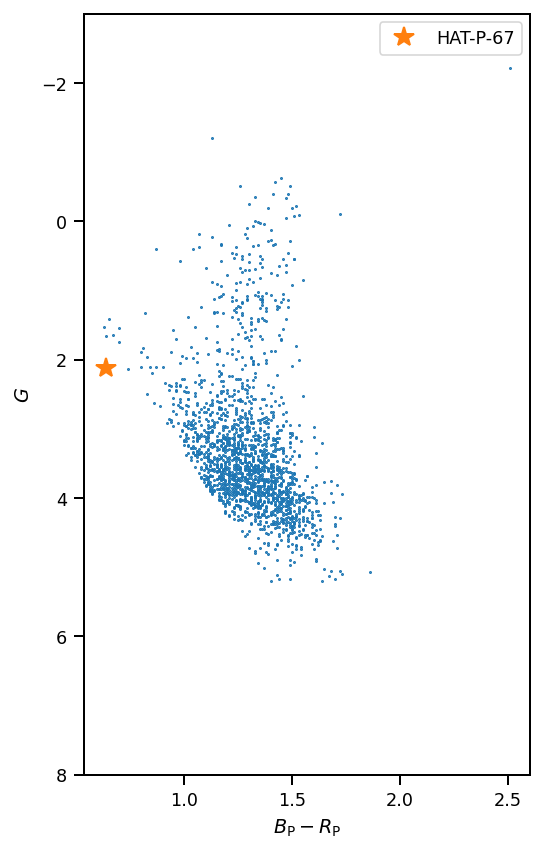

In [15]:
plt.figure(figsize=(4, 7))
plt.plot(df['(BP-RP)'], df['G_absolute_mag'], '.', ms=1)
plt.plot(df_targ['bp_rp'], df_targ['G_absolute_mag'], '*', ms=10, label='HAT-P-67')
plt.xlabel('$B_\mathrm{P}-R_\mathrm{P}$')
plt.ylabel('$G$')
plt.ylim(8, -3)
plt.legend();

Bummer, HAT-P-67 sits just to the blue side of the selection criteria used by Leiner et al.

## Custom comparison sample

We'll make a custom comparison sample using the TESS Input Catalog with these criteria:

- $6300 <T_\mathrm{eff} [K] < 6500 $
- $3.5 < \log{g} < 4.5$
- $4 < T_\mathrm{mag} < 10$

In [16]:
df_comparison = Table.read('../../data/TESS/TICv8.xml').to_pandas()

In [17]:
df_targ_TESS = Table.read('../../data/TESS/TICv8_2_HAT_P_67.xml').to_pandas()

In [18]:
df_comparison['bp_rp'] = df_comparison['gaiabp'] - df_comparison['gaiarp']
df_comparison['D'] = 1/(df_comparison['plx']/1000)
df_comparison['G_absolute_mag'] = df_comparison['GAIAmag'] - 5*np.log10(df_comparison['D'])+5

In [19]:
df_comparison.columns.values

array(['ID', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS',
       'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra',
       'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag',
       'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat',
       'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag',
       'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag',
       'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag',
       'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag',
       'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag',
       'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH',
       'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho',
       'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont',
       'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV',
       'epos_EBV', 'EBVflag', 'eneg_Mass', 'epos_Mass', 'eneg_Rad',
       '

(5.0, 3.0)

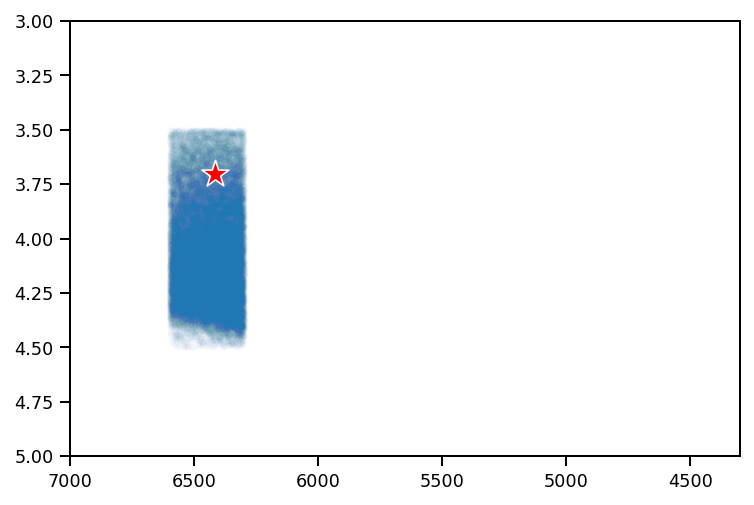

In [20]:
plt.plot(df_comparison['Teff'], df_comparison['logg'], '.', alpha=0.01)
plt.scatter(df_targ_TESS['Teff'], df_targ_TESS['logg'], marker='*', 
            c='r', s=200, ec='w', zorder=10, label='HAT-P-67')
plt.xlim(7000, 4300)
plt.ylim(5, 3)

Text(0.5, 0, '$T_\\mathrm{mag}$')

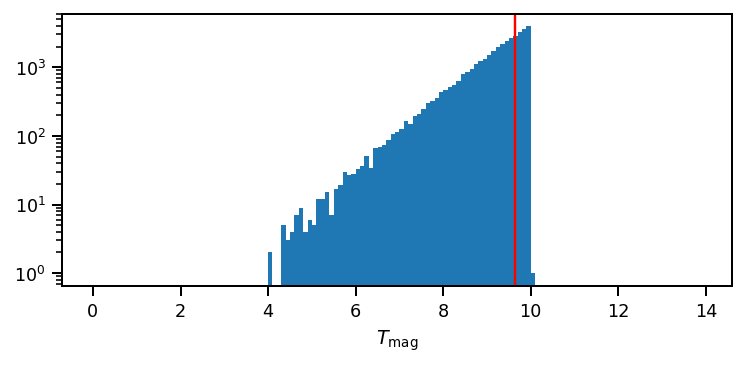

In [21]:
plt.figure(figsize=(6, 2.5))
plt.hist(df_comparison['Tmag'], bins=np.arange(0, 14, 0.1));
plt.axvline(df_targ_TESS['Tmag'][0], color='r');
plt.yscale('log'); plt.xlabel('$T_\mathrm{mag}$')

In [22]:
mask = df_comparison['Tmag'] > df_targ_TESS['Tmag'][0]

Text(0.5, 0, '$D$ (pc)')

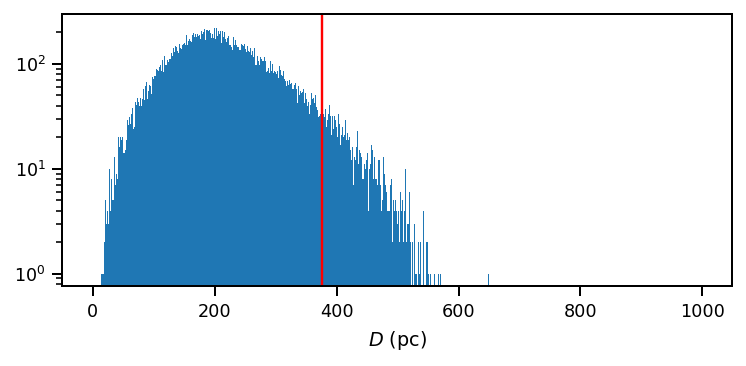

In [23]:
plt.figure(figsize=(6, 2.5))
plt.hist(df_comparison['D'], bins=np.arange(0, 1000, 1));
plt.axvline(1/(df_targ_TESS['plx']/1000)[0], color='r');
plt.yscale('log'); plt.xlabel('$D$ (pc)')

Neat, most of our comparison sample is closer than HAT-P-67.

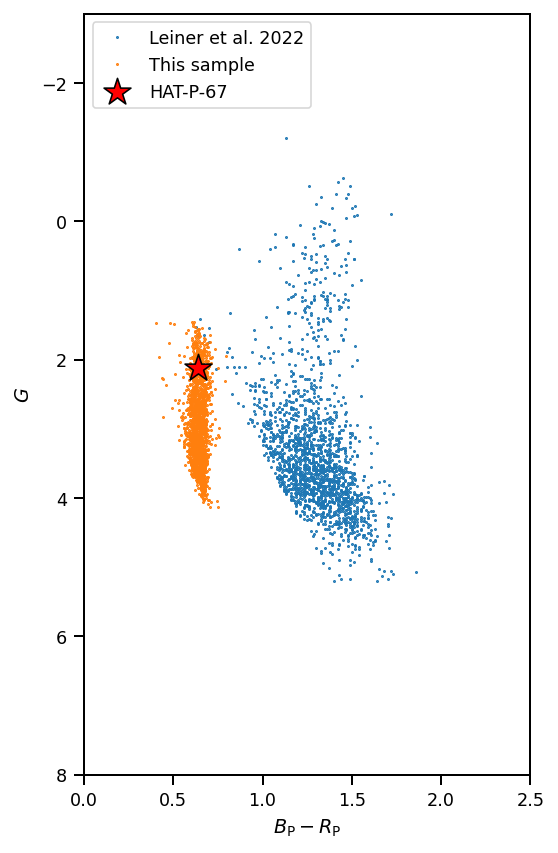

In [48]:
plt.figure(figsize=(4, 7))
plt.plot(df['(BP-RP)'], df['G_absolute_mag'], '.', ms=1, label='Leiner et al. 2022')
plt.plot(df_comparison['bp_rp'], df_comparison['G_absolute_mag'], 
         '.', ms=1, label='This sample', alpha=1)
plt.scatter(df_targ['bp_rp'], df_targ['G_absolute_mag'], marker='*', s=200, 
            label='HAT-P-67',zorder=10, ec='k', color='r')

plt.xlabel('$B_\mathrm{P}-R_\mathrm{P}$')
plt.ylabel('$G$')
plt.ylim(8, -3)
plt.xlim(0, 2.5)
plt.legend();

OK! we have a sample!  They're all about the sample color, but different magnitudes.  

Now we want to find out how many of these have TESS data available.  That's too many to search.  Let's refine the sample.  Let's pick the ones that are closest on the sky.  That may seem arbitrary, but these will may share similar TESS systematics, similar Sectors, similar lunar background illumination, similar seasonal visibility, similar Galactic latitude/longitude, similar reddening, etc.

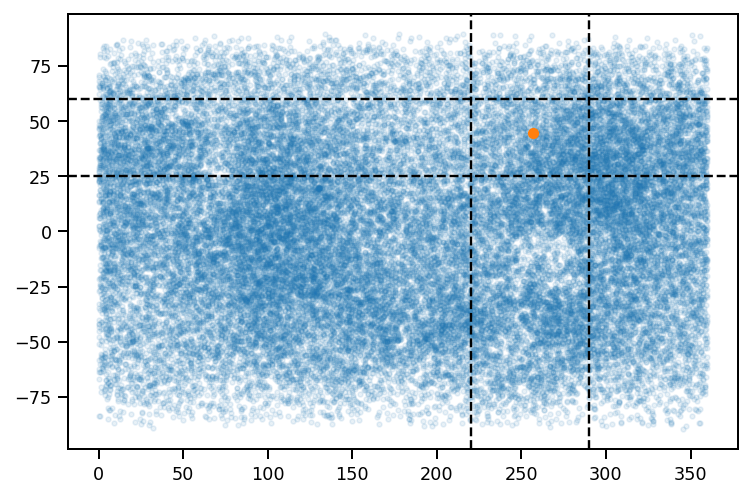

In [25]:
plt.scatter(df_comparison['ra'], df_comparison['dec'], marker='.', alpha=0.1)
plt.scatter(df_targ_TESS['ra'], df_targ_TESS['dec'], marker='o')
plt.axvline(220, color='k', linestyle='dashed')
plt.axvline(290, color='k', linestyle='dashed')
plt.axhline(25, color='k', linestyle='dashed')
plt.axhline(60, color='k', linestyle='dashed')

In [26]:
mask = ((df_comparison['ra'] > 220) & 
        (df_comparison['ra'] < 290) & 
        (df_comparison['dec'] > 25) & 
        (df_comparison['dec'] < 60) )

In [27]:
df_comparison = df_comparison[mask].reset_index(drop=True)

In [28]:
len(df_comparison)

1774

Now let's look for TESS lightcurves for these!

In [29]:
import lightkurve as lk

In [30]:
n_sources = len(df_comparison)

In [31]:
df_comparison.head()

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,bp_rp,D,G_absolute_mag
0,68074093,20190415,<NA>,3046-00526-1,651-054088,14425965+4006572,<NA>,J144259.59+400658.1,1487312711787225216,,...,220.748157,40.116180,0.025795,0.028725,1,0,152458955,0.590170,131.338211,3.064175
1,158539353,20190415,<NA>,3860-00366-1,722-053669,14455203+5418375,<NA>,J144552.03+541837.0,1606467783322323712,56249771,...,221.466810,54.310233,0.021539,0.026117,1,0,152636904,0.586640,242.134857,3.110214
2,68121729,20190415,<NA>,2560-00806-1,631-051175,14462594+3600138,<NA>,J144625.93+360013.7,1293918653801421568,49899857,...,221.608037,36.003801,0.016486,0.021758,1,0,152688607,0.663071,202.156204,3.659464
3,310003487,20190415,<NA>,3867-01403-1,741-052997,14502820+5806201,<NA>,J145028.13+580620.4,1613917872249237760,57367549,...,222.617110,58.105690,0.085172,0.078735,1,0,152932493,0.612440,227.464020,1.878687
4,158514451,20190415,71896,3863-00876-1,733-055241,14421941+5631197,<NA>,J144219.51+563119.4,1607721948132539136,57366179,...,220.581367,56.521892,0.022091,0.022801,1,0,152466504,0.655861,116.862160,3.755151


### Randomly select a subsample

In [32]:
df_comparison['n_SPOC'] = 0

In [33]:
df_comparison['iqr_90_10'] = 0.0

In [34]:
df_comparison.loc[4, 'n_SPOC']

0

In [35]:
from tqdm.notebook import trange

Pre-cache the files by downloading them now, they'll load much faster later.

In [36]:
i=0

In [ ]:
for i in trange(n_sources):
    source = 'TIC {}'.format(df_comparison.loc[i, 'ID'])
    sr = lk.search_lightcurve(source, author='SPOC')
    if len(sr)>0: 
        #lcs = sr.download_all()
        df_comparison.loc[i, 'n_SPOC'] = len(sr)
        lc = sr[0].download(quality_bitmask='hard').normalize()
        qloR, qhiR = np.percentile(lc.remove_outliers(sigma_lower=3).flux.value, (5, 95))
        df_comparison.loc[i, 'iqr_90_10'] = qhiR - qloR
        

## Overview: Where does HAT-P-67 fall in terms of TESS amplitude of modulation?

In [45]:
df_targ_TESS

,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec,_selected_
0,198588220,256.610671,44.776963,9.43591,-18.1845,9.63331,STAR,tmgaia2,20190415,,...,0.711416,0.711,256.610728,44.776885,0.021655,0.022838,1,0,0.001758,True


In [44]:
qhi-qlo

MaskedNDArray(0.00365535)

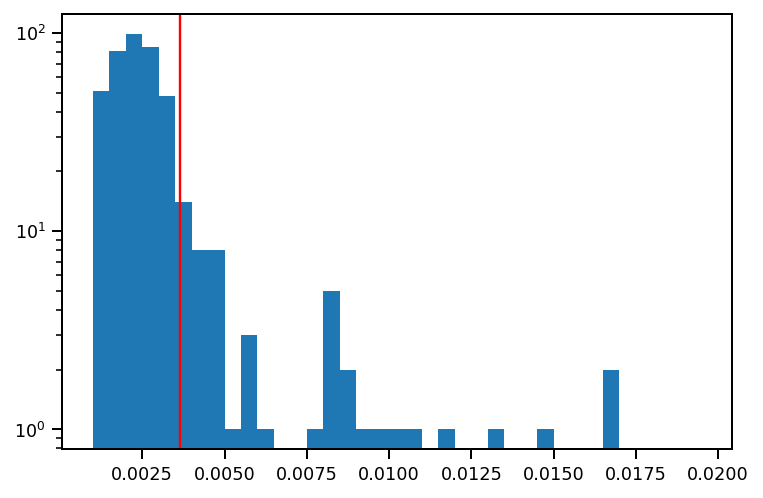

In [43]:
plt.hist(df_comparison['iqr_90_10'], bins=np.arange(0.001, 0.02, 0.0005));
plt.axvline(qhi-qlo, color='r')
plt.yscale('log')

In [49]:
(df_comparison['iqr_90_10']>(qhi-qlo)).sum()/(df_comparison['iqr_90_10']>0).sum()

0.10874704491725769

So HAT-P-67 has a TESS lightcurve that is more variable than about 89% of other sources of similar effective temperature.

In [50]:
df_targ['G_absolute_mag']

0    2.125570
1    8.776339
Name: G_absolute_mag, dtype: float64

In [51]:
df_comparison = df_comparison[df_comparison.iqr_90_10 > 0]

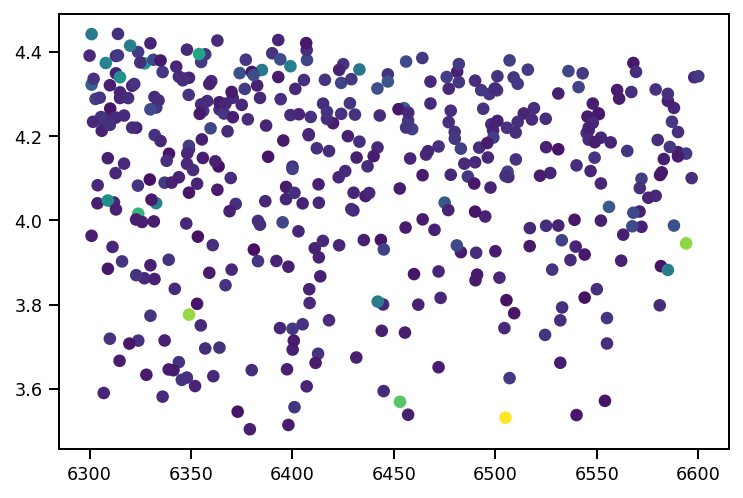

In [52]:
plt.scatter(df_comparison['Teff'], df_comparison['logg'], c=df_comparison['iqr_90_10'],
            vmin=0, vmax=0.02, marker='o', s=30)
#plt.scatter(2.12, qhi-qlo, marker='*', s=200, ec='k')

### Spot-checking lightcurves: Reference

In [53]:
sr = lk.search_lightcurve('HAT-P-67', author='SPOC')
lc0 = sr[0].download(quality_bitmask='hard').normalize()

In [54]:
qlo, qhi = np.percentile(lc0.remove_outliers(sigma_lower=3).flux.value, (5, 95))

(0.98, 1.01)

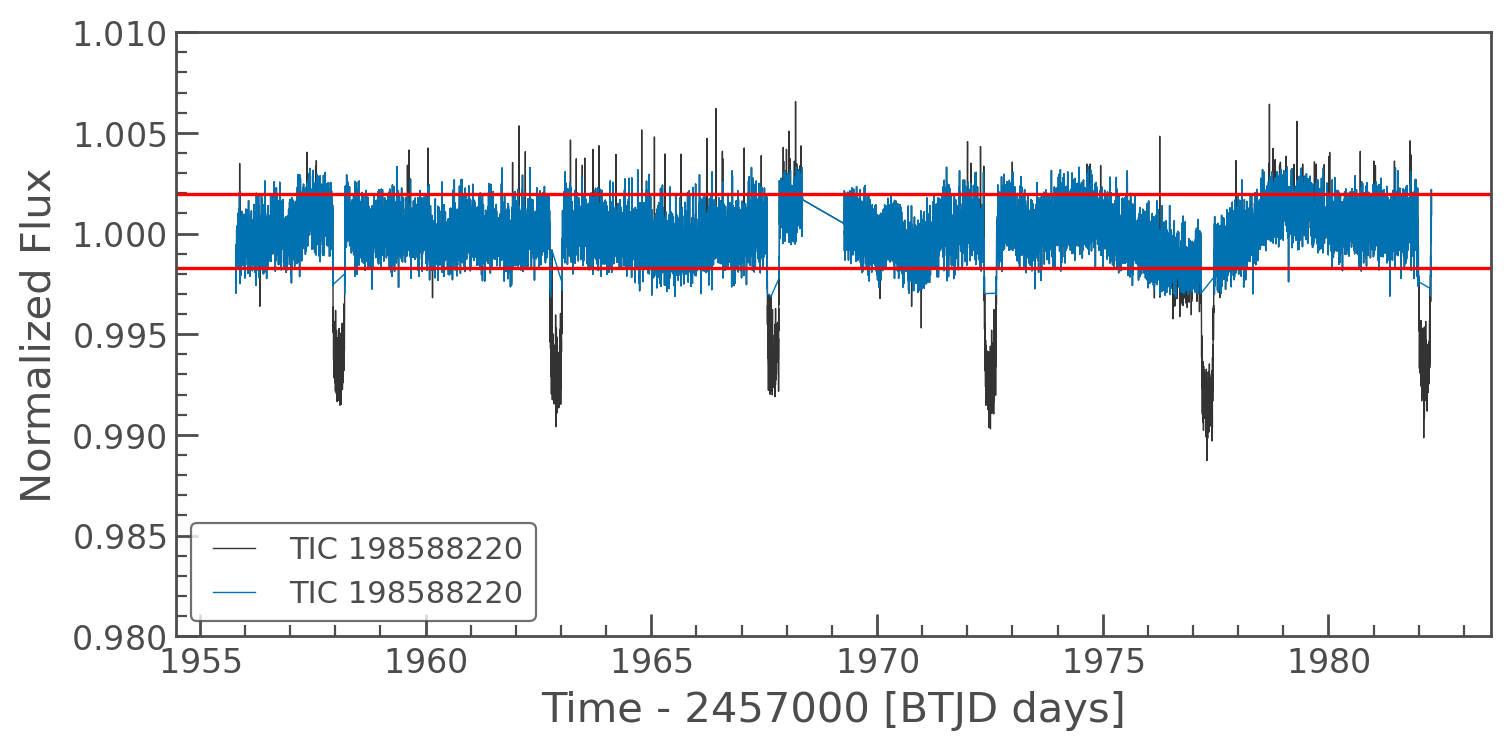

In [55]:
ax = lc0.plot()
lc0.remove_outliers(sigma_lower=3, sigma_upper=3).plot(ax=ax)
ax.axhline(qlo, color='r')
ax.axhline(qhi, color='r')
ax.set_ylim(0.98, 1.01)

### Spot-checking lightcurves: Random search

In [59]:
mask = df_comparison.iqr_90_10 > 0.0036

In [61]:
mask.sum()

50

In [63]:
df_subsample = df_comparison[mask].reset_index()

In [64]:
i=0

In [102]:
i=35

In [120]:
df_targ_TESS

,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec,_selected_
0,198588220,256.610671,44.776963,9.43591,-18.1845,9.63331,STAR,tmgaia2,20190415,,...,0.711416,0.711,256.610728,44.776885,0.021655,0.022838,1,0,0.001758,True


In [122]:
i=45

In [126]:
source

'TIC 274238240'

In [137]:
df_subsample['TESS_Name'] = 'TIC ' + df_subsample['ID'].astype(str)

In [140]:
df_subsample['TESS_Name'].to_csv('../../data/gaia/subsample_query.csv', index=False, header=False)

In [141]:
! head ../../data/gaia/subsample_query.csv

TIC 272614473
TIC 229898798
TIC 28314713
TIC 155986992
TIC 154294575
TIC 159854126
TIC 230197257
TIC 284700375
TIC 20182165
TIC 165656833


In [225]:
i=0

In [173]:
df_subsample['Prot'] = 0.0

In [ ]:
for i in range(len(df_subsample)):
    source = 'TIC {}'.format(df_merge.loc[i, 'ID'])
    sr = lk.search_lightcurve(source, author='SPOC')
    if len(sr)>0:
        lc = sr[0].download(quality_bitmask='hard').normalize()
        qloR, qhiR = np.percentile(lc.remove_outliers(sigma_lower=3).flux.value, (5, 95))

        pg = lc.to_periodogram(minimum_period=0.5*u.day, maximum_period=15*u.day, oversample_factor=10)
        prot = pg.period_at_max_power.to(u.day).value
        ax2 = pg.plot()
        ax2.axvline(prot)
        df_subsample.loc[i, 'Prot'] = prot

        ax = lc.plot()
        lc.remove_outliers(sigma_lower=3, sigma_upper=3).plot(ax=ax)
        ax.axhline(qloR, color='g')
        ax.axhline(qhiR, color='g')

        ax.axhline(qlo, color='r')
        ax.axhline(qhi, color='r')
        ax.set_ylim(0.98, 1.01)
    else:
        print('na')

In [227]:
df_subsample_GDR3 = Table.read('../../data/gaia/subsample_comparison_GDR3.vot').to_pandas()

df_subsample['GAIA'] = df_subsample['GAIA'].astype(int)
df_merge = pd.merge(df_subsample, df_subsample_GDR3, left_on='GAIA', right_on='source_id')

In [228]:
hat_p_67_vbroad = Table.read('../../data/gaia/1668443694513O-result.vot').to_pandas()['vbroad'][0]

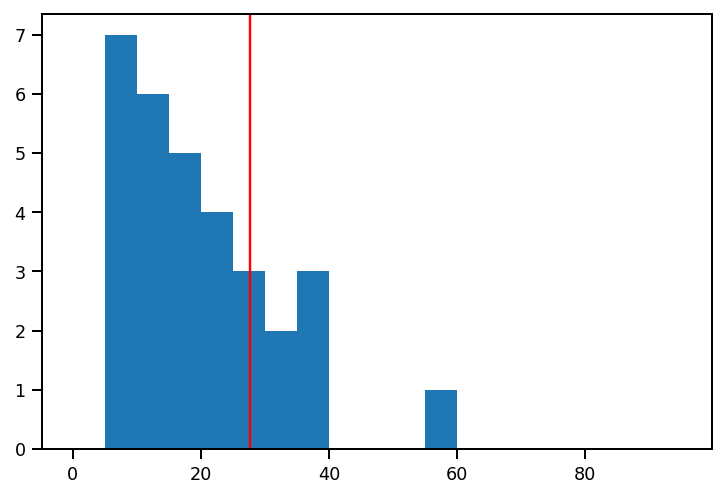

In [229]:
plt.hist(df_subsample_GDR3.vbroad, bins=np.arange(0, 100, 5));
plt.axvline(hat_p_67_vbroad, color='r');

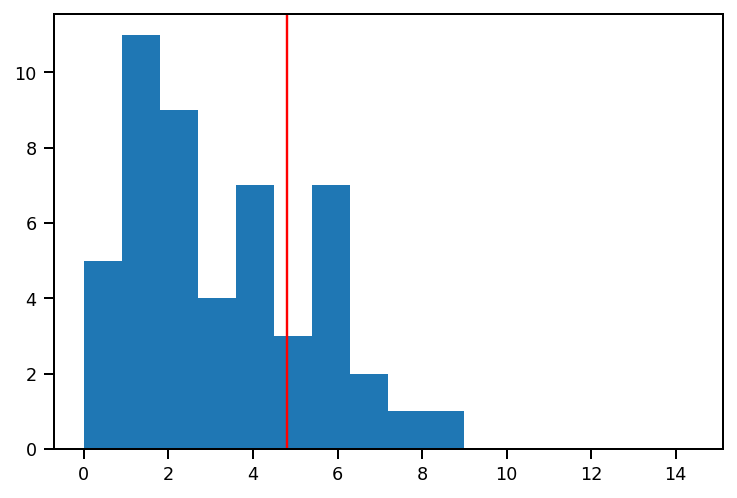

In [237]:
plt.hist(df_subsample.Prot, bins=np.arange(0, 15, 0.9));
plt.axvline(4.8, color='r');

Neat!

(0.0, 50.0)

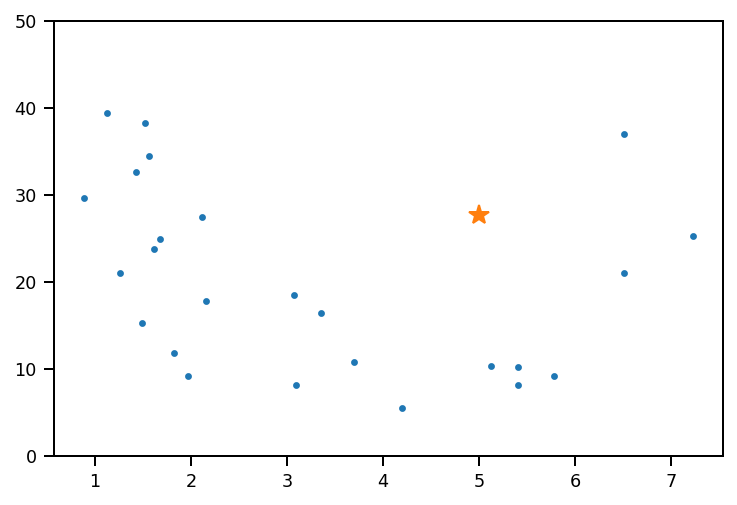

In [246]:
plt.plot(df_merge.Prot, df_merge.vbroad, '.')
plt.plot(5, hat_p_67_vbroad, '*', ms=10)
plt.ylim(0, 50)